## Практична робота №6
Тема: КЛАСИФІКАЦІЯ ТА КЛАСТЕРИЗАЦІЯ.
Мета: ознайомитись з
- методами класифікації та кластеризації
- моделями, що використовують дерева прийняття рішень
- інструментами факторного аналізу методом головних компонент та методом найбільшої подібності.

Виконав: ІП-13 Дойчев К.М.
Перевірила: Ліхоузова Т.А.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv('./data/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# check the types of the data
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

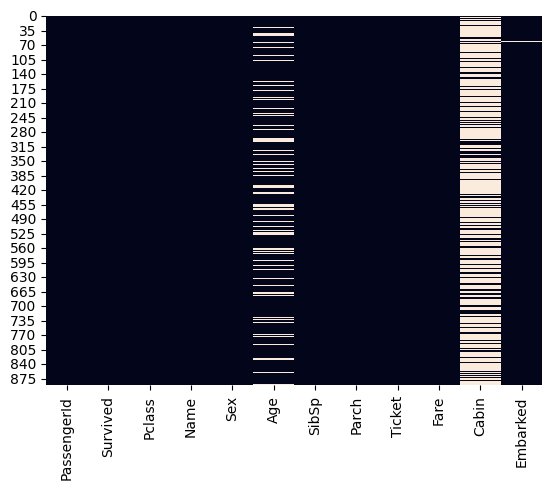

In [6]:
# heatmap of the missing values
sns.heatmap(df.isnull(), cbar=False)

In [7]:
# drop the unnecessary columns
df = df.drop(['PassengerId'], axis=1)
df = df.drop(['Cabin'], axis=1) # too many missing values
df = df.drop(['Ticket'], axis=1) # not relevant
df = df.drop(['Parch'], axis=1)
df = df.drop(['SibSp'], axis=1)

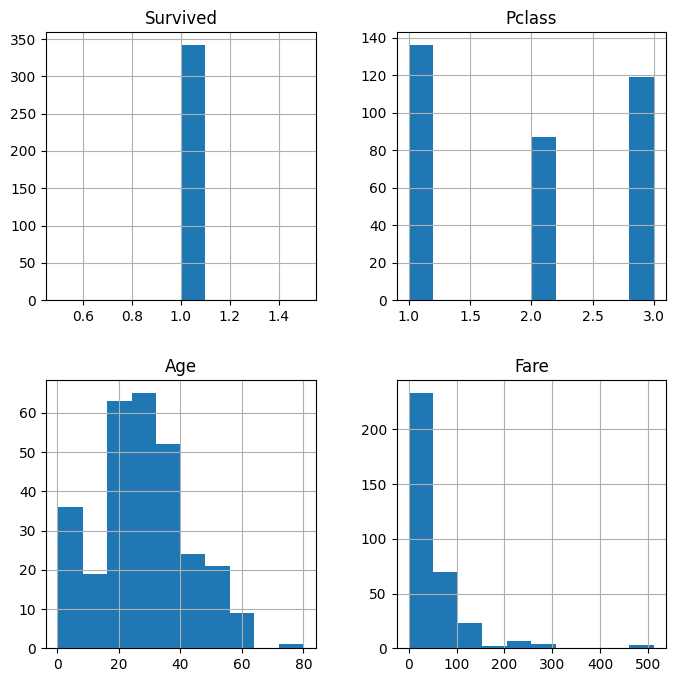

In [8]:
# histograms of the survived passengers
df[df['Survived'] == 1].hist(figsize=(8, 8))
plt.show()

In [9]:
# fill the missing age values with the mean

df['Age'] = df['Age'].fillna(df['Age'].mean())

In [10]:
# get rid of strings
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
# fill null values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mean())
df = df.drop(['Name'], axis=1)

In [11]:
# check for null values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

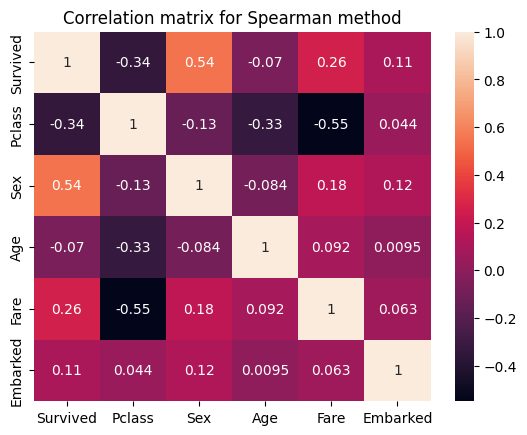

In [17]:
# check the correlation
fig, ax = plt.subplots()
pearson_corr = df.corr(method='pearson')

ax.set_title('Correlation matrix for Spearman method')
sns.heatmap(pearson_corr, annot=True)

plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# drop the target variable
X=df.drop("Survived",axis=1)
y=df["Survived"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

y_pred_lg = model_lin.predict(X_test)

r2 = r2_score(y_test, y_pred_lg)
mse = mean_squared_error(y_test, y_pred_lg)
accuracy_lg = accuracy_score(y_test, np.round(y_pred_lg))

print(f"R^2: {r2}\nMean squared error: {mse}\nAccuracy rate: {accuracy_lg}")

R^2: 0.43908586141534867
Mean squared error: 0.13602268520966077
Accuracy rate: 0.7877094972067039


## Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
rfc_parameters = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20, 50, 100]
}
rfc_grid_search = GridSearchCV(rfc, rfc_parameters, cv=5)
rfc_grid_search.fit(X_train, y_train)

print("Best value for 'n_estimators' hyperparameter is", rfc_grid_search.best_params_['n_estimators'])
print("Best value for 'max_depth' hyperparameter is", rfc_grid_search.best_params_['max_depth'])

Best value for 'n_estimators' hyperparameter is 100
Best value for 'max_depth' hyperparameter is 5


In [16]:
rfc = rfc_grid_search.best_estimator_
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred)
print("Test Accuracy: ",test_accuracy)

Test Accuracy:  0.8212290502793296


Based on the results, the Random Forest model is a better choice for this dataset with an accuracy of 82%.